<a href="https://colab.research.google.com/github/waraporn19/AIPrototype_2021/blob/main/Tensorflow(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential (ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน / วิ่งเป็นเส้นตรง)
2. Functional (ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทางให้มีความซับซ้อนได้)

3. Subclassing ไม่ได้เรียน (ยากสุด แต่สามารถแก้ไขได้ตามที่เราต้องการ)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Sequential

 Import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

 Define 
- กำหนดว่า network จะหน้าตาเป็นยังไง
- ข้างใน Sequential จะมี list[] ของ เลเยอร์

In [2]:
# Define Sequential model with 3 layers     
model = keras.Sequential(
    [
        keras.Input(shape=(4,)) ,
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="output"),
    ]
)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Train (รวมกับการนำเข้าข้อมูลใน colab notebook หน้า)

Predict

In [4]:
# Call model on a test input
x = tf.ones((5, 4))   
y = model(x)
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 0.03215646,  0.02913205,  0.06623282, -0.2247571 ],
       [ 0.03215646,  0.02913205,  0.06623282, -0.2247571 ],
       [ 0.03215646,  0.02913205,  0.06623282, -0.2247571 ],
       [ 0.03215646,  0.02913205,  0.06623282, -0.2247571 ],
       [ 0.03215646,  0.02913205,  0.06623282, -0.2247571 ]],
      dtype=float32)>

In [5]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

#Sequential แบบที่ 2

In [6]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)) )
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

In [7]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


## ปรับเปลี่ยน Network

In [8]:
model2.pop()     #ถอดเลเยอร์สุดท้ายออก 

In [9]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [10]:
model2.add(layers.Dense(6)) 

In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [12]:
x = tf.ones((5, 4))   #สร้าง metrix ที่มีเลข1
y = model2(x)
y

#ค่าออกมา 5 ค่า แต่ละคลาสมี 6 ค่า ตาม node output 

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [13]:
model3 = keras.Sequential(
    [
        keras.Input(shape=(4,) ),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

In [14]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


## ลองเทรน Suquential model ที่สร้างขึ้นมาเอง

In [15]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

###load dataset  10 class

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


### แปลงค่าเป็น 0-1 เพื่อนำเข้า network

In [17]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### plot รูปตัวอย่าง

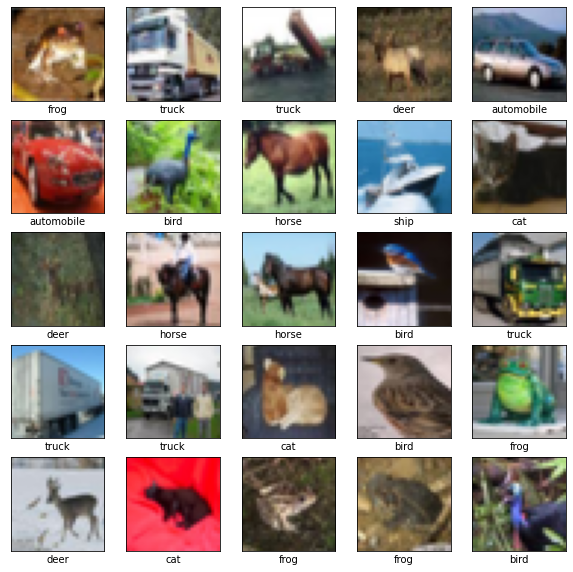

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### define

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

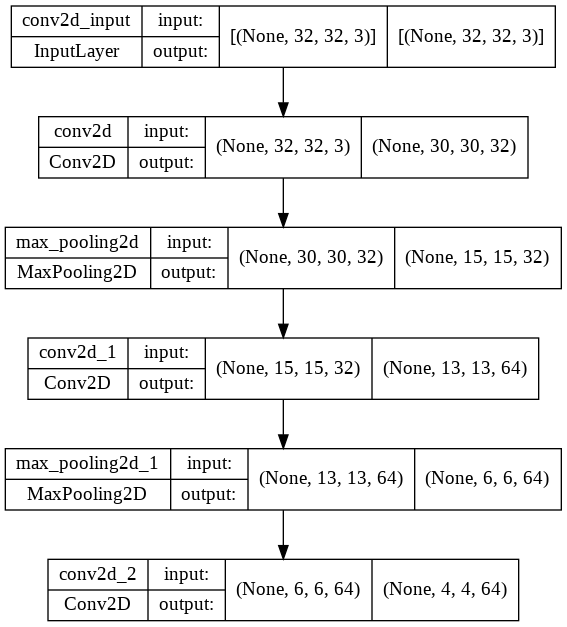

In [21]:
keras.utils.plot_model(model , show_shapes=True)

### ต่อด้วย flatten และ dense เพื่อทำนาย

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

### DEfine trainning parameter

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train

In [25]:
history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 16s 5ms/step - loss: 1.5308 - accuracy: 0.4427 - val_loss: 1.2808 - val_accuracy: 0.5329
Epoch 2/2
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1713 - accuracy: 0.5854 - val_loss: 1.0763 - val_accuracy: 0.6149


### Test

313/313 - 1s - loss: 1.0763 - accuracy: 0.6149 - 771ms/epoch - 2ms/step


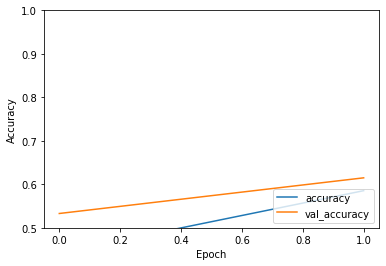

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Functional
my_model

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [28]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

In [29]:
input_image = keras.Input(shape=(32, 32, 3),  name = "img")
model = layers.Conv2D(32, (3, 3), activation="relu" ,  name = "conv1")(input_image)
model =layers.MaxPooling2D((2, 2) ,  name = "maxp1" )(model)
model = layers.Conv2D(64, (3, 3), activation="relu" ,  name = "conv")(model)
model =layers.MaxPooling2D((2, 2) ,  name = "maxp2")(model)
model = layers.Conv2D(64, (3, 3), activation="relu" ,  name = "conv3")(model)
model = layers.Flatten()(model)
model = layers.Dense(64, activation='relu')(model)
output = layers.Dense(10)(model)

In [30]:
my_model = keras.Model(input_image, output, name="mymodel")

In [31]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxp1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv (Conv2D)               (None, 13, 13, 64)        18496     
                                                                 
 maxp2 (MaxPooling2D)        (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0   

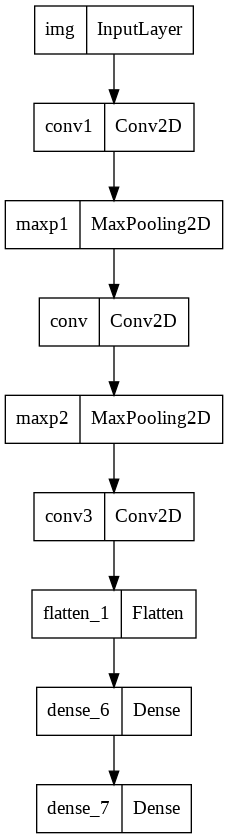

In [32]:
tf.keras.utils.plot_model(
    my_model,
    to_file="model5.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

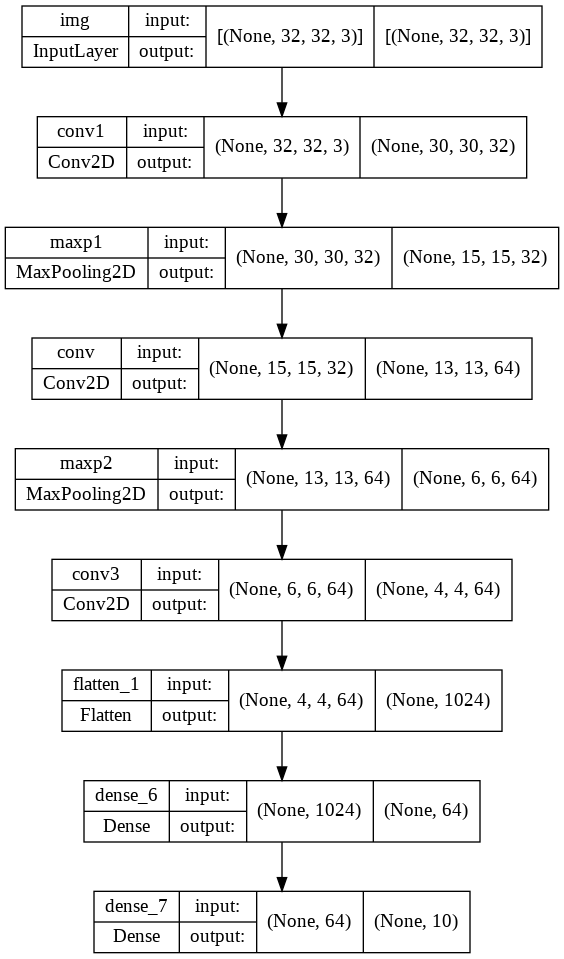

In [33]:
keras.utils.plot_model(my_model, "multi_input_and_output_model.png", show_shapes=True)

In [34]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
history = my_model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5545 - accuracy: 0.4311 - val_loss: 1.3049 - val_accuracy: 0.5292
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2016 - accuracy: 0.5713 - val_loss: 1.1143 - val_accuracy: 0.6039
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0588 - accuracy: 0.6275 - val_loss: 1.0630 - val_accuracy: 0.6262
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9596 - accuracy: 0.6643 - val_loss: 0.9677 - val_accuracy: 0.6612
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8868 - accuracy: 0.6888 - val_loss: 0.9347 - val_accuracy: 0.6764
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8274 - accuracy: 0.7097 - val_loss: 0.9023 - val_accuracy: 0.6830
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7801 - accuracy: 0.7257 - val_loss: 0.8933 - val_accuracy:

313/313 - 1s - loss: 0.9371 - accuracy: 0.7049 - 718ms/epoch - 2ms/step


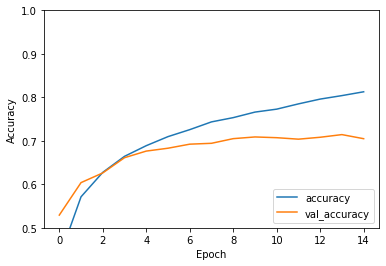

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [37]:
print(test_acc)

0.7049000263214111


# ResNet
resnet model

In [38]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_3[0][0]']               
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_4[0][0]']               
                                                                                         

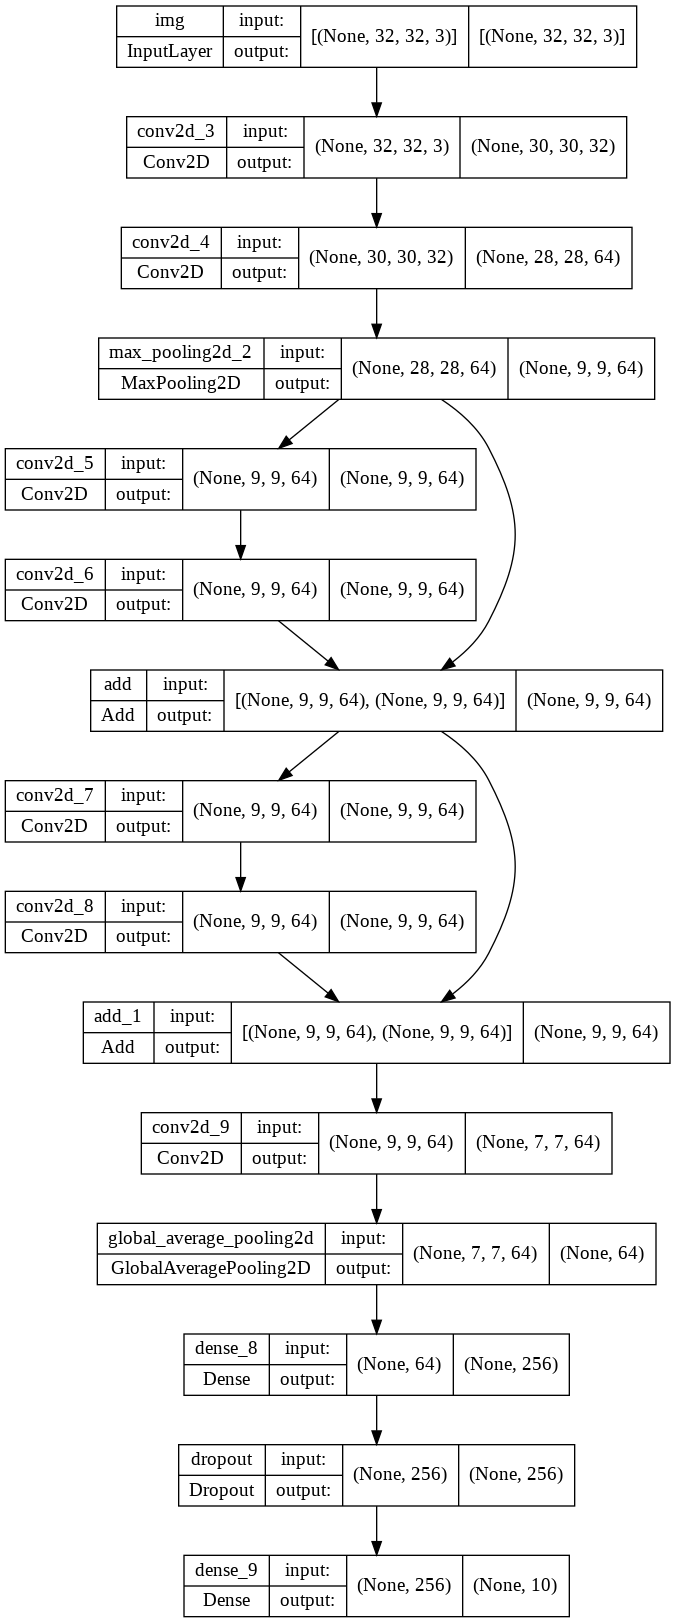

In [39]:
keras.utils.plot_model(resnet_model, "multi_input_and_output_model.png", show_shapes=True)

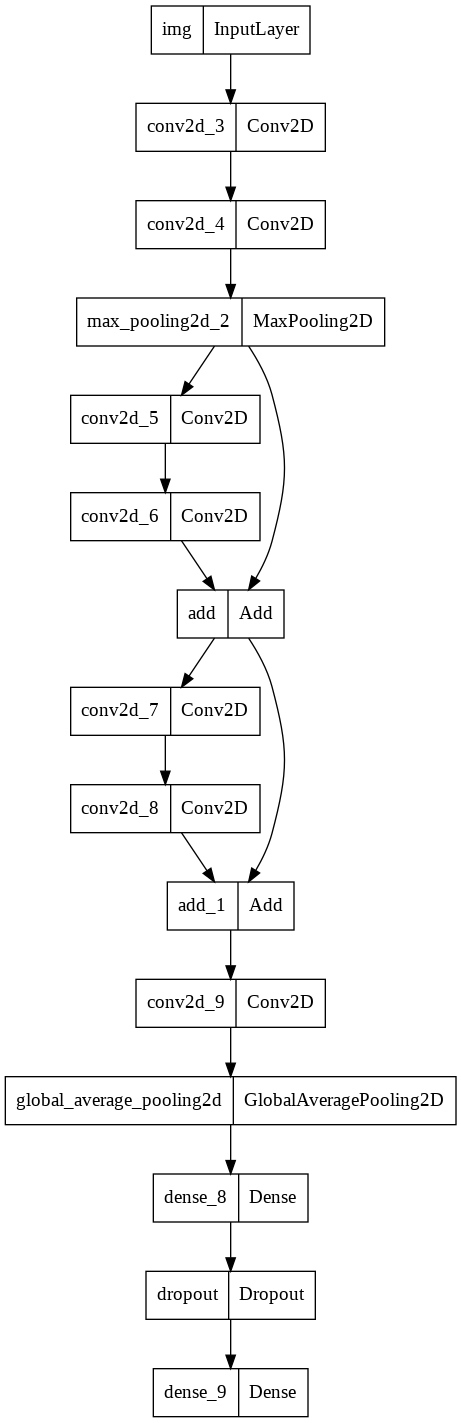

In [40]:
tf.keras.utils.plot_model(
    resnet_model,
    to_file="mode2l.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [41]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
history2 = resnet_model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 11s 6ms/step - loss: 1.6612 - accuracy: 0.3635 - val_loss: 1.3091 - val_accuracy: 0.5057
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1916 - accuracy: 0.5690 - val_loss: 1.0202 - val_accuracy: 0.6271
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9775 - accuracy: 0.6504 - val_loss: 0.9210 - val_accuracy: 0.6674
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8500 - accuracy: 0.7002 - val_loss: 0.8215 - val_accuracy: 0.7152
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7663 - accuracy: 0.7333 - val_loss: 0.7637 - val_accuracy: 0.7334
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6957 - accuracy: 0.7588 - val_loss: 0.7440 - val_accuracy: 0.7433
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6422 - accuracy: 0.7770 - val_loss: 0.7162 - val_accu

313/313 - 1s - loss: 0.7274 - accuracy: 0.7833 - 956ms/epoch - 3ms/step


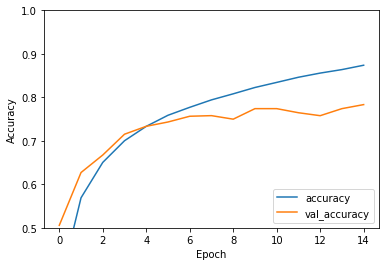

In [43]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=2)

In [44]:
print(test_acc)

0.78329998254776


# HW modify `my_model` ให้มี skip connection แล้ว train-test เทียบกับ `my_model` และ `resnet_model`

In [45]:
input_image = keras.Input(shape=(32, 32, 3),  name = "img")
model = layers.Conv2D(32, (3, 3), activation="relu" ,  name = "conv1")(input_image)
model = layers.Conv2D(64, (3, 3), activation="relu" ,  name = "conv2")(model)
block_1_output = layers.MaxPooling2D(3)(model)

model = layers.Conv2D(64, (3, 3), activation="relu",  padding="same" ,  name = "conv3")(block_1_output)
# model = layers.Conv2D(64, (3, 3), activation="relu",  padding="same" ,  name = "conv4")(model)
block_2_output = layers.add([model, block_1_output])


model = layers.Conv2D(64, (3, 3), activation="relu",  padding="same" ,  name = "conv5")(block_2_output)
# model = layers.Conv2D(64, (3, 3), activation="relu",  padding="same" ,  name = "conv6")(model)
# model = layers.Conv2D(64, (3, 3), activation="relu",  padding="same" ,  name = "conv7")(model)
block_3_output = layers.add([model, block_2_output])

model =layers.MaxPooling2D((2, 2) ,  name = "maxp2")(block_3_output)
model = layers.Flatten()(model)
model = layers.Dense(64, activation='relu')(model)
output = layers.Dense(10)(model)


my_model_skip = keras.Model(input_image, output, name="Skip_connection")
my_model_skip.summary()

Model: "Skip_connection"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2 (Conv2D)                 (None, 28, 28, 64)   18496       ['conv1[0][0]']                  
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2[0][0]']                  
                                                                                    

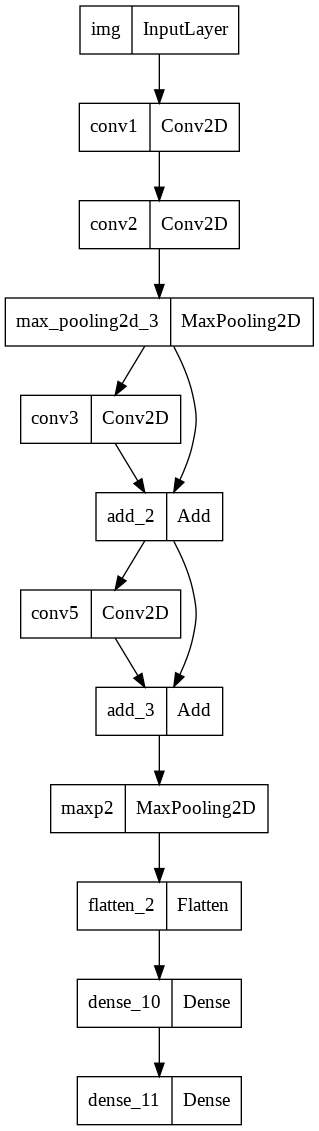

In [46]:
tf.keras.utils.plot_model(
    my_model_skip,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

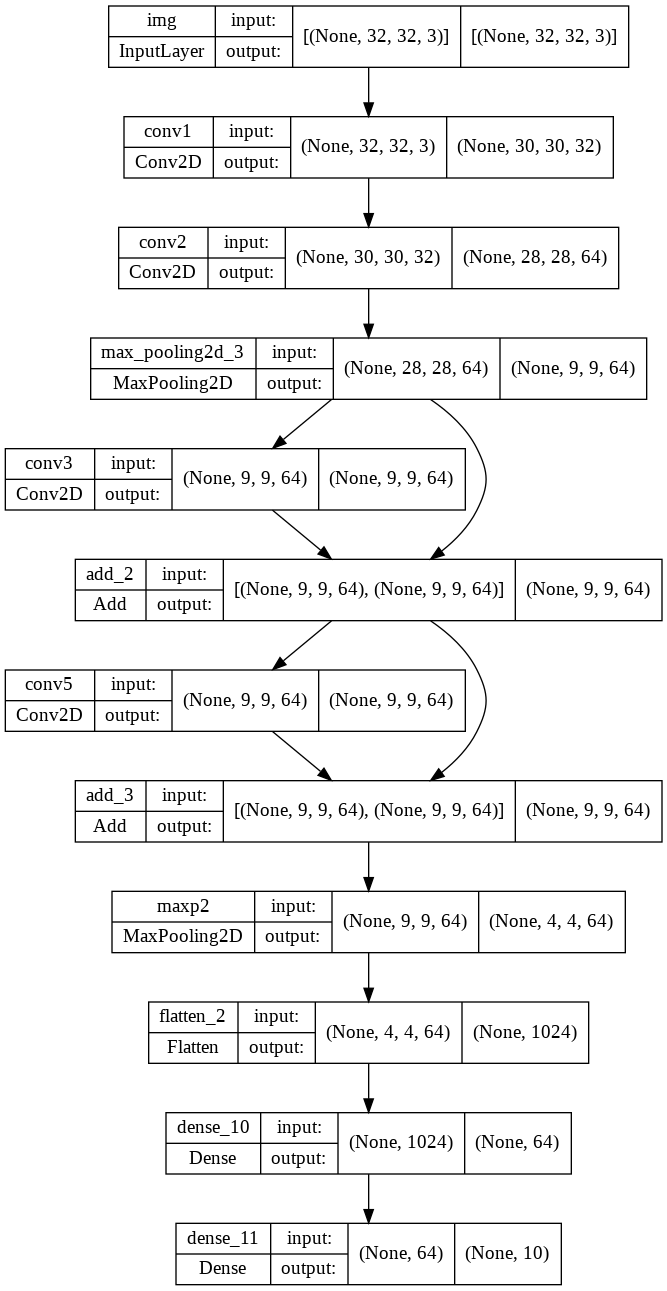

In [47]:
keras.utils.plot_model(my_model_skip, "multi_input_and_output_model.png", show_shapes=True)

In [48]:
my_model_skip.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
history3 = my_model_skip.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3793 - accuracy: 0.5031 - val_loss: 1.0601 - val_accuracy: 0.6313
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9549 - accuracy: 0.6674 - val_loss: 0.9258 - val_accuracy: 0.6797
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8046 - accuracy: 0.7172 - val_loss: 0.8088 - val_accuracy: 0.7222
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7142 - accuracy: 0.7504 - val_loss: 0.7691 - val_accuracy: 0.7355
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6511 - accuracy: 0.7733 - val_loss: 0.7417 - val_accuracy: 0.7510
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5931 - accuracy: 0.7945 - val_loss: 0.8027 - val_accuracy: 0.7332
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5452 - accuracy: 0.8102 - val_loss: 0.7271 - val_accuracy

313/313 - 1s - loss: 0.9622 - accuracy: 0.7574 - 865ms/epoch - 3ms/step


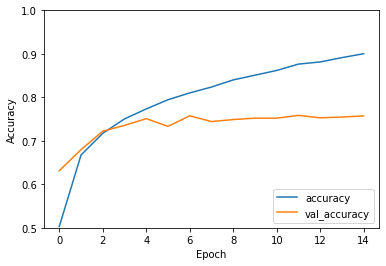

In [50]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model_skip.evaluate(test_images,  test_labels, verbose=2)

In [51]:
print(test_acc)

0.7573999762535095


In [52]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
path2data = '/content/drive/My Drive/Classification Dataset'

In [ ]:
import os

In [ ]:
AA = os.path.join(path,'AA1.xlsx')